Found 12 after_reboot CSV files
Loading dataset: C:\Users\Dspike\Documents\FL-AdroidMaLD\normalized_dataset\combined_dataset.csv
Original number of features: 125
Target classes: ['Adware' 'Backdoor' 'FileInfector' 'PUA' 'Ransomware' 'Riskware'
 'Scareware' 'Trojan' 'Trojan_Banker' 'Trojan_Dropper' 'Trojan_SMS'
 'Trojan_Spy']
Class distribution:
  Riskware: 6792
  Adware: 5142
  Trojan: 4025
  Ransomware: 1550
  Trojan_Spy: 1039
  Trojan_SMS: 911
  Trojan_Dropper: 733
  PUA: 625
  Backdoor: 546
  Scareware: 424
  Trojan_Banker: 123
  FileInfector: 119
Loaded combined dataset with 22029 samples and 125 features.
Setting up federated learning with 5 clients

===== Training Client 1 =====
Running GA-PSO feature selection for ensemble...
Running genetic algorithm...
Best GA solution fitness: 0.999688
GA selected 39 features out of 125
Running particle swarm optimization...
Stopping search: maximum iterations reached --> 10
PSO selected 45 features out of 125
Client 1 selected 45 features ou

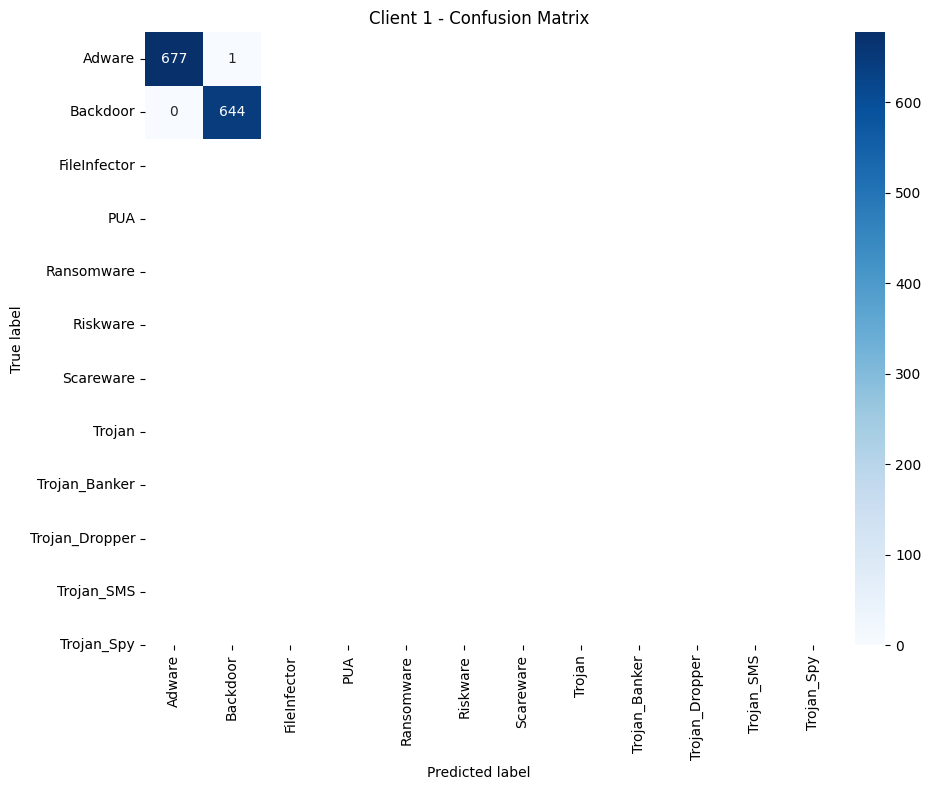

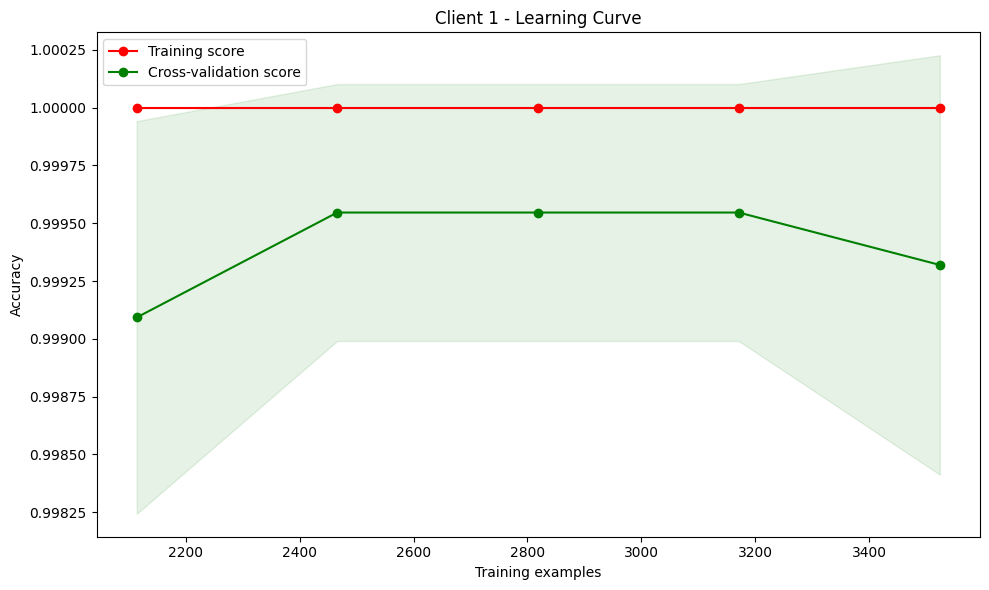


===== Training Client 2 =====
Running GA-PSO feature selection for ensemble...
Running genetic algorithm...
Best GA solution fitness: 0.99972
GA selected 35 features out of 125
Running particle swarm optimization...
Stopping search: maximum iterations reached --> 10
PSO selected 42 features out of 125
Client 2 selected 42 features out of 125 (33.6%)
Client 2 accuracy: 99.92%


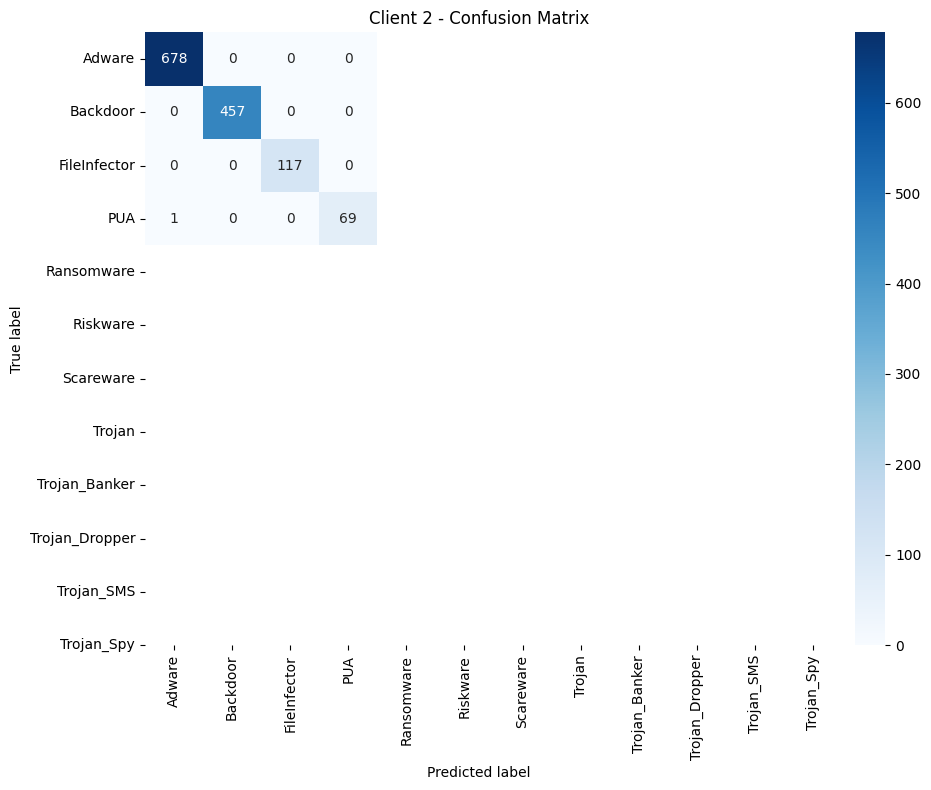

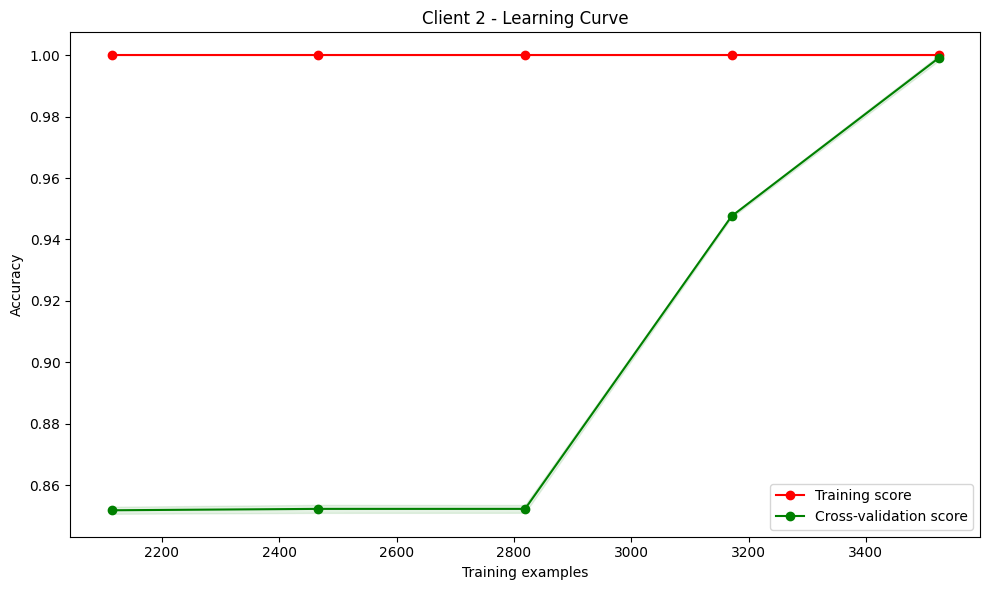


===== Training Client 3 =====
Running GA-PSO feature selection for ensemble...
Running genetic algorithm...
Best GA solution fitness: 0.999712
GA selected 36 features out of 125
Running particle swarm optimization...
Stopping search: maximum iterations reached --> 10
PSO selected 35 features out of 125
Client 3 selected 35 features out of 125 (28.0%)
Client 3 accuracy: 99.70%


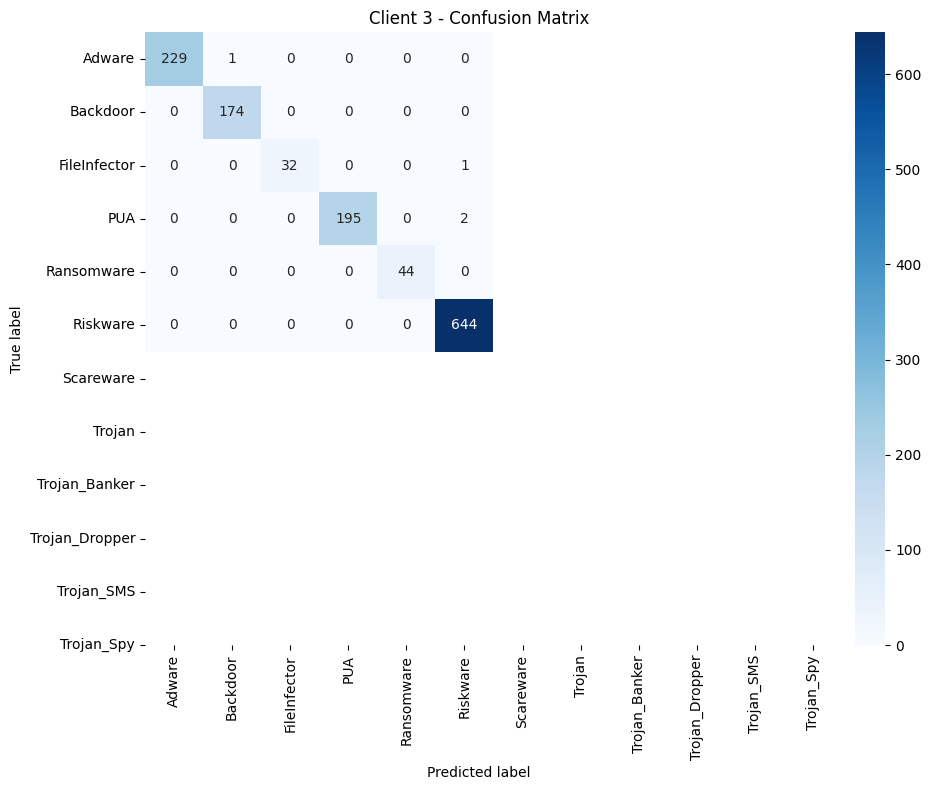

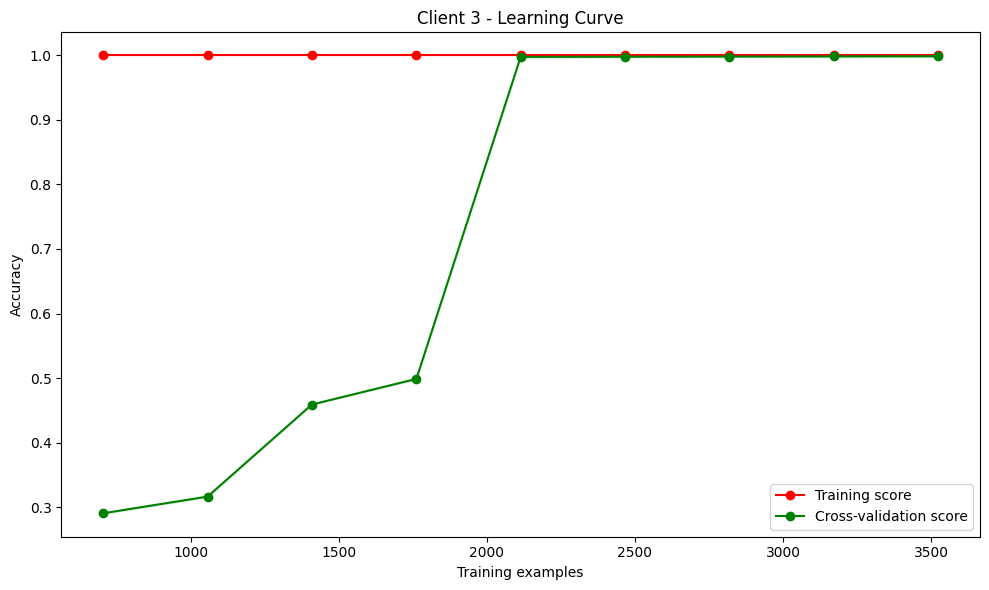


===== Training Client 4 =====
Running GA-PSO feature selection for ensemble...
Running genetic algorithm...
Best GA solution fitness: 0.999704
GA selected 37 features out of 125
Running particle swarm optimization...
Stopping search: maximum iterations reached --> 10
PSO selected 37 features out of 125
Client 4 selected 37 features out of 125 (29.6%)
Client 4 accuracy: 99.92%


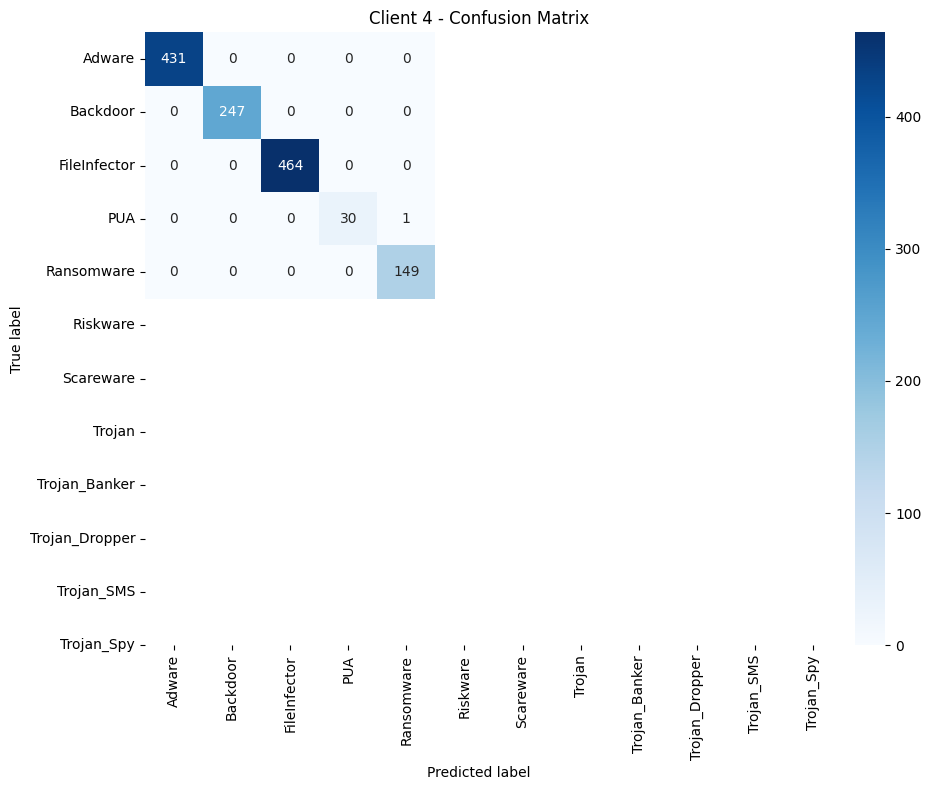

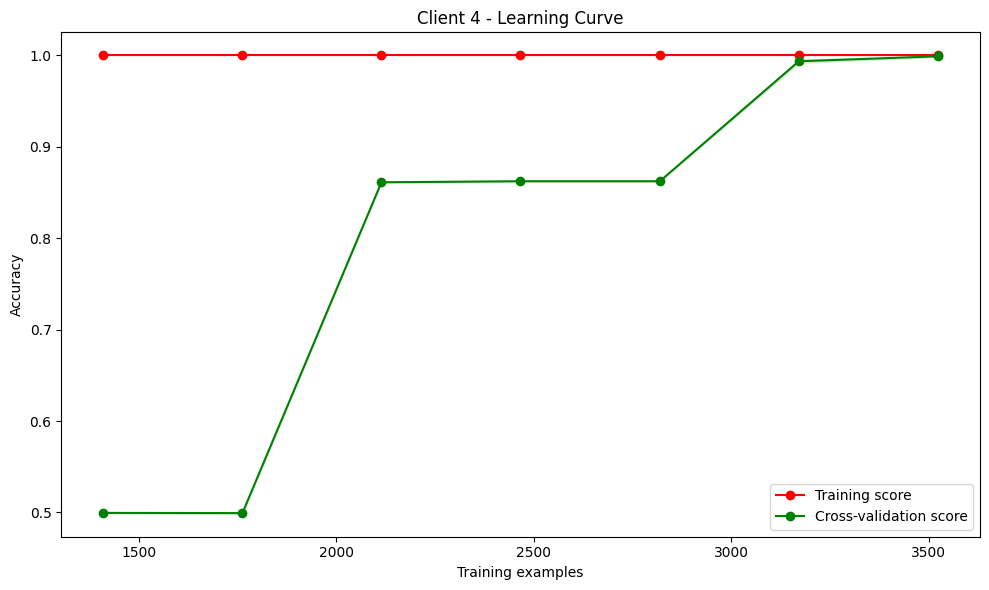


===== Training Client 5 =====
Running GA-PSO feature selection for ensemble...
Running genetic algorithm...
Best GA solution fitness: 0.999712
GA selected 36 features out of 125
Running particle swarm optimization...
Stopping search: maximum iterations reached --> 10
PSO selected 34 features out of 125
Client 5 selected 34 features out of 125 (27.2%)
Client 5 accuracy: 99.85%


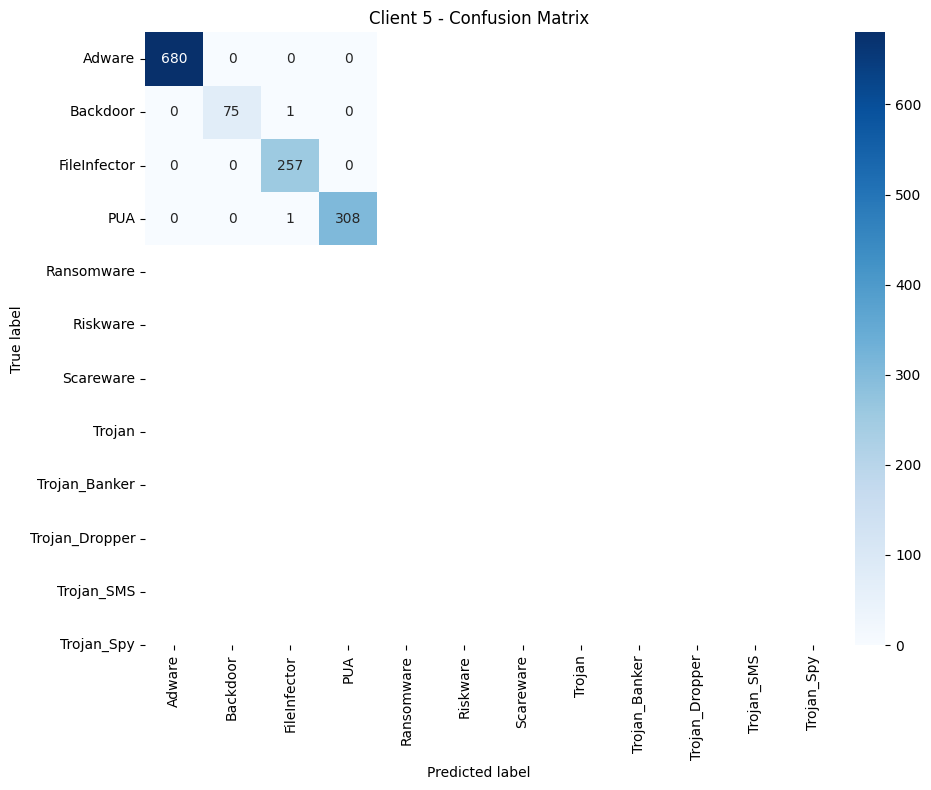

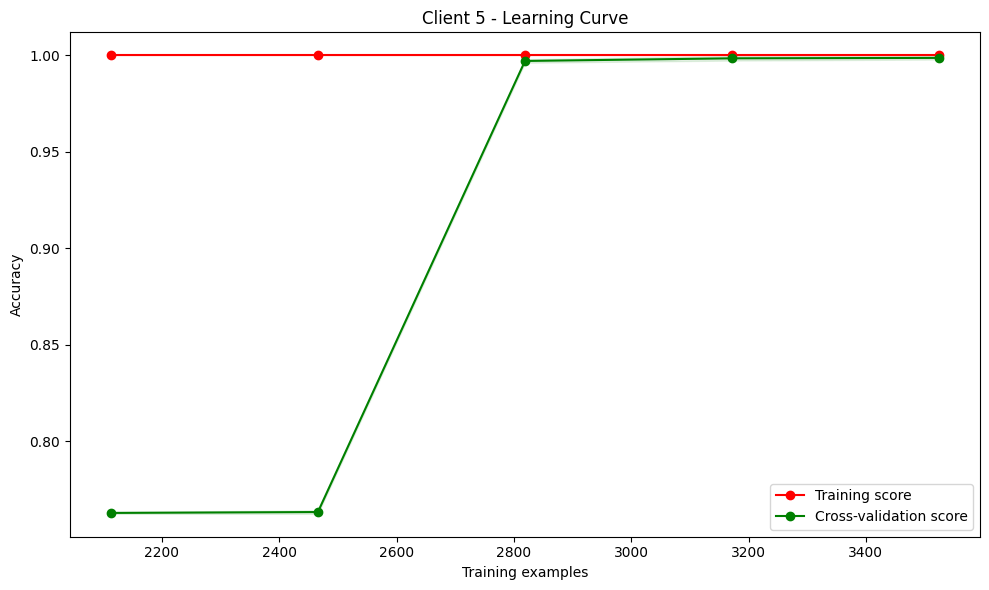


===== Federated Model Aggregation =====
Using voting-based federated aggregation
Federated model accuracy: 77.89%
Classification Report for Federated Model:
                precision    recall  f1-score   support

        Adware       0.69      1.00      0.81       535
      Backdoor       0.00      0.00      0.00        58
  FileInfector       0.00      0.00      0.00         8
           PUA       0.83      0.19      0.30        81
    Ransomware       0.99      0.62      0.76       173
      Riskware       0.76      1.00      0.86       664
     Scareware       0.00      0.00      0.00        37
        Trojan       0.96      1.00      0.98       388
 Trojan_Banker       0.00      0.00      0.00        11
Trojan_Dropper       1.00      0.11      0.20        72
    Trojan_SMS       0.00      0.00      0.00        85
    Trojan_Spy       0.00      0.00      0.00        91

      accuracy                           0.78      2203
     macro avg       0.44      0.33      0.33      2203


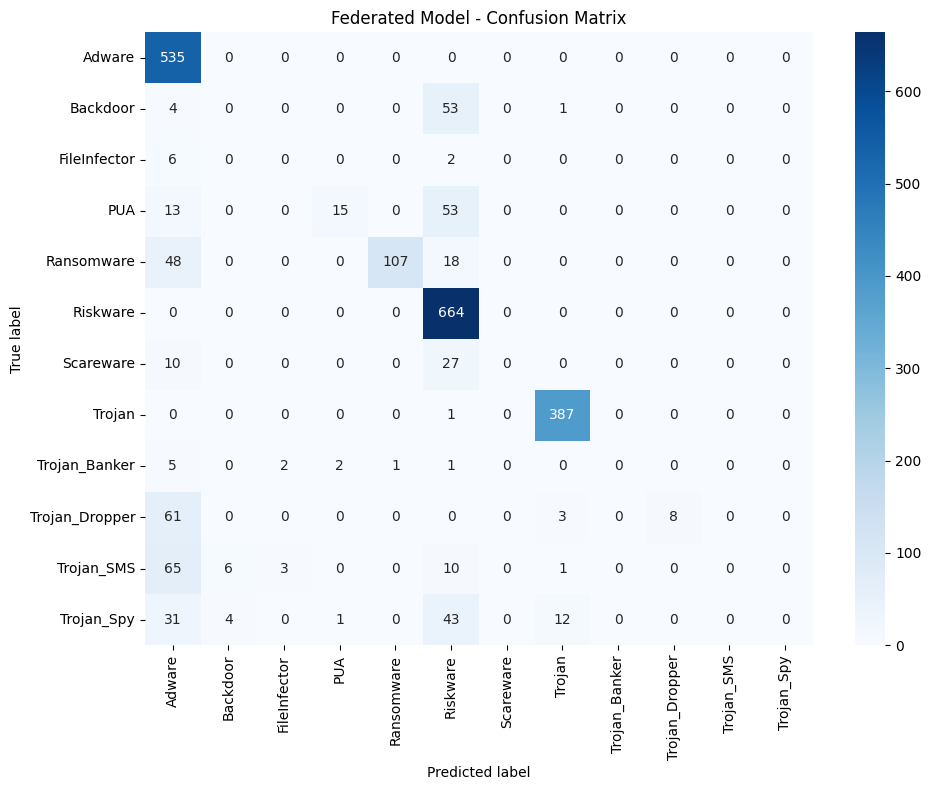


===== Model Performance Comparison =====


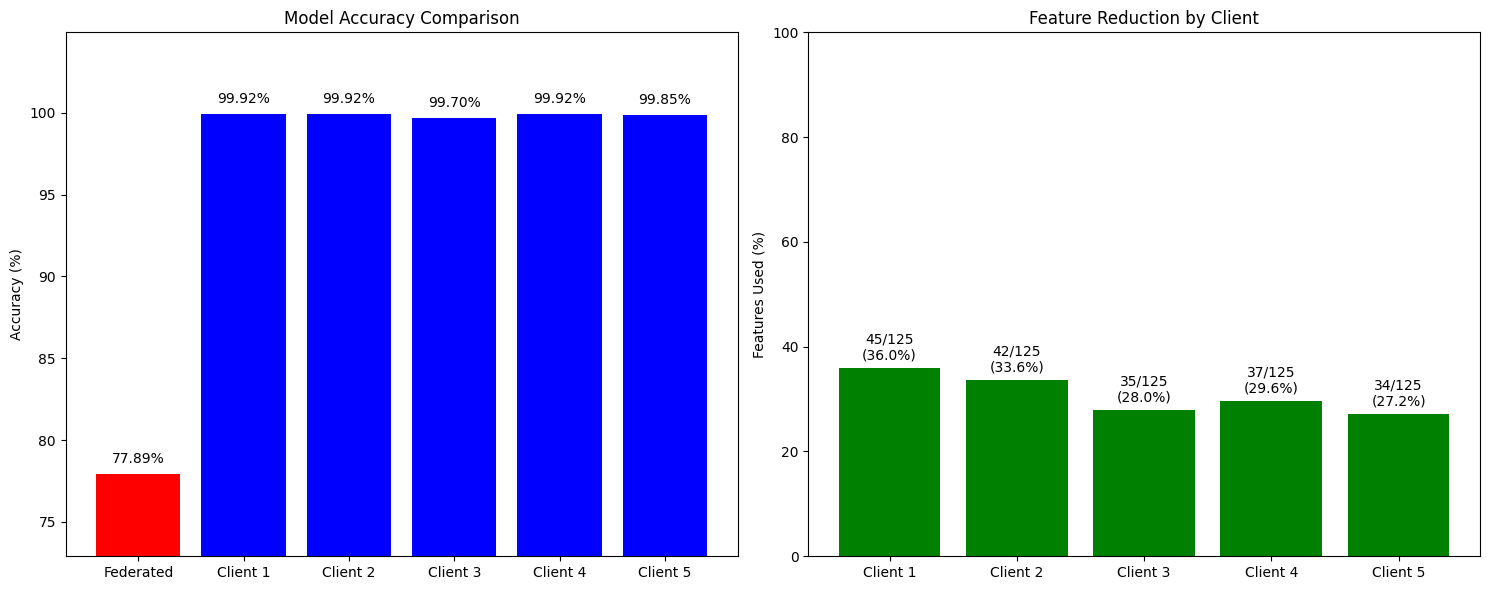

--------------------------------------------------------------------------------
Model           | Accuracy        | Features        | Reduction      
--------------------------------------------------------------------------------
Federated       |  77.89%         | N/A             | N/A            
Client 1         |  99.92%         | 45              | 45/125 (36.0%) 
Client 2         |  99.92%         | 42              | 42/125 (33.6%) 
Client 3         |  99.70%         | 35              | 35/125 (28.0%) 
Client 4         |  99.92%         | 37              | 37/125 (29.6%) 
Client 5         |  99.85%         | 34              | 34/125 (27.2%) 
--------------------------------------------------------------------------------

===== Feature Selection Analysis =====


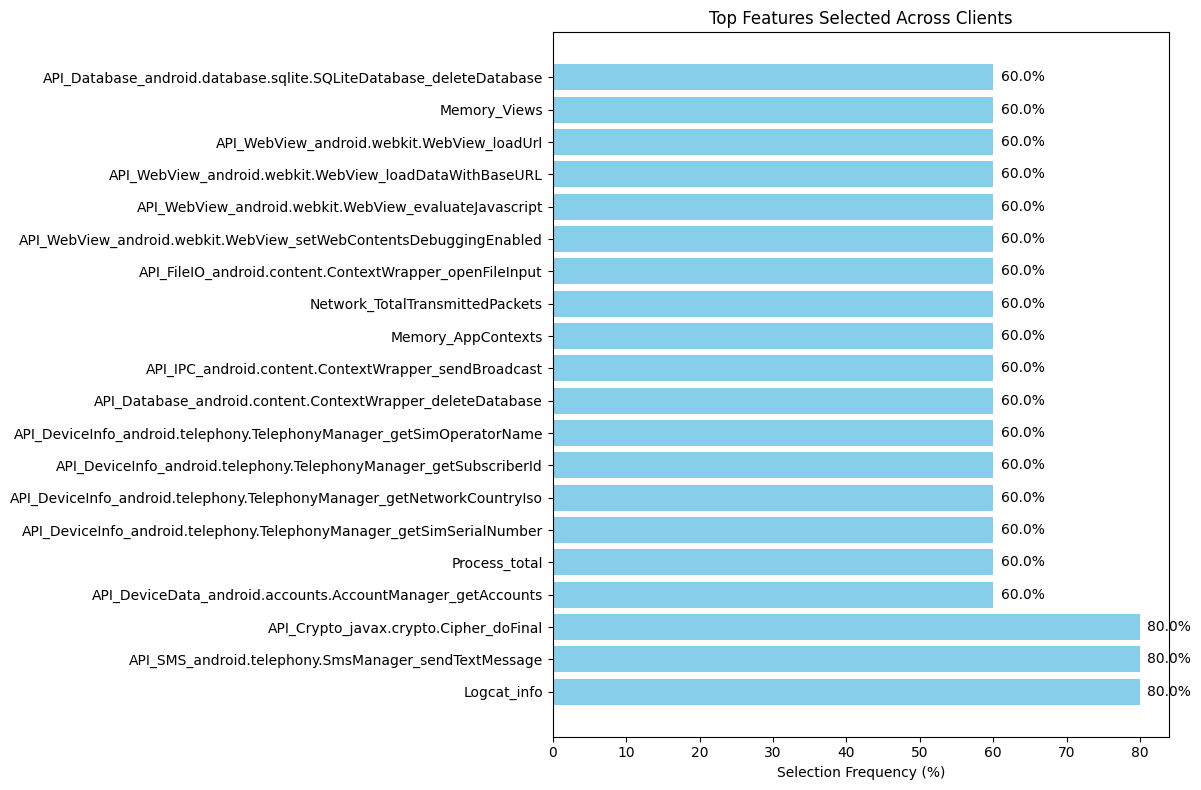


Feature Selection Statistics:
Average number of features selected: 38.6
Features selected by all clients: 0
Features selected by no clients: 20

Top 10 most selected features:
1. Logcat_info: 80.0%
2. API_SMS_android.telephony.SmsManager_sendTextMessage: 80.0%
3. API_Crypto_javax.crypto.Cipher_doFinal: 80.0%
4. API_DeviceData_android.accounts.AccountManager_getAccounts: 60.0%
5. Process_total: 60.0%
6. API_DeviceInfo_android.telephony.TelephonyManager_getSimSerialNumber: 60.0%
7. API_DeviceInfo_android.telephony.TelephonyManager_getNetworkCountryIso: 60.0%
8. API_DeviceInfo_android.telephony.TelephonyManager_getSubscriberId: 60.0%
9. API_DeviceInfo_android.telephony.TelephonyManager_getSimOperatorName: 60.0%
10. API_Database_android.content.ContextWrapper_deleteDatabase: 60.0%

Total execution time: 1961.68 seconds


In [2]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pyswarm import pso
from deap import base, creator, tools, algorithms
import random
import copy
import time

# Ensure results directory exists
results_dir = r'C:\Users\Dspike\Documents\FL-AdroidMaLD\results'
os.makedirs(results_dir, exist_ok=True)

# Suppress warnings
warnings.filterwarnings('ignore')

# Function to load and preprocess the dataset
def load_dataset(filename):
    print(f"Loading dataset: {filename}")
    df = pd.read_csv(filename)
    
    # Check if required columns exist
    if "Category" not in df.columns:
        raise ValueError("'Category' column not found in the dataset")
    
    # Print original number of features
    features = [col for col in df.columns if col not in ["Category", "Family"]]
    print(f"Original number of features: {len(features)}")
    
    # Encode categorical features
    for col in features:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    
    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    df[features] = imputer.fit_transform(df[features])
    
    # Preprocess the data
    X = df[features].values
    
    # Encode the target labels
    le = LabelEncoder()
    y = le.fit_transform(df["Category"])
    
    # Display class names and counts
    class_names = le.classes_
    class_counts = pd.Series(df["Category"]).value_counts()
    print(f"Target classes: {class_names}")
    print("Class distribution:")
    for cls, count in class_counts.items():
        print(f"  {cls}: {count}")
    
    return X, y, features, class_names

# Function to split data for federated learning clients
def create_federated_clients(X, y, n_clients=5, strategy='iid'):
    """
    Split data among federated clients
    strategy: 'iid' for independent and identically distributed
              'non_iid' for non-identical distribution
    """
    clients_data = []
    
    if strategy == 'iid':
        # IID: Random split among clients
        indices = np.random.permutation(len(X))
        client_size = len(indices) // n_clients
        
        for i in range(n_clients):
            start_idx = i * client_size
            end_idx = (i + 1) * client_size if i < n_clients - 1 else len(indices)
            client_indices = indices[start_idx:end_idx]
            clients_data.append((X[client_indices], y[client_indices]))
    
    elif strategy == 'non_iid':
        # Non-IID: Sort by label and distribute unevenly
        sorted_indices = np.argsort(y)
        chunks = np.array_split(sorted_indices, n_clients * 2)  # Split into 2*n_clients chunks
        
        # Assign chunks to clients to create non-IID distribution
        for i in range(n_clients):
            # Each client gets 2 different chunks
            client_indices = np.concatenate([chunks[i], chunks[n_clients + i]])
            clients_data.append((X[client_indices], y[client_indices]))
    
    return clients_data

# Function to evaluate a feature subset using a classifier
def evaluate_features(X, y, features_idx, clf_type='svm'):
    # Select features
    if len(features_idx) == 0:
        return 0
    
    selected_features = X[:, features_idx.astype(bool)]
    
    if selected_features.shape[1] == 0:
        return 0
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        selected_features, y, test_size=0.3, random_state=42, stratify=y)
    
    # Initialize classifier
    if clf_type == 'svm':
        clf = SVC(kernel='linear', random_state=42)
    elif clf_type == 'dt':
        clf = DecisionTreeClassifier(random_state=42)
    elif clf_type == 'rf':
        clf = RandomForestClassifier(random_state=42)
    elif clf_type == 'knn':
        clf = KNeighborsClassifier(n_neighbors=5)
    elif clf_type == 'ensemble':
        clf = VotingClassifier(
            estimators=[
                ('svm', SVC(kernel='linear', random_state=42, probability=True)),
                ('dt', DecisionTreeClassifier(random_state=42)),
                ('rf', RandomForestClassifier(random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=5))
            ],
            voting='soft'
        )
    
    # Train and evaluate
    try:
        clf.fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)
        return accuracy
    except Exception as e:
        print(f"Error in evaluation: {e}")
        return 0

# GA functions
def ga_fitness(individual, X, y, clf_type):
    # Calculate feature count penalty to encourage smaller feature sets
    features_used = sum(individual)
    total_features = len(individual)
    
    # Get accuracy with selected features
    accuracy = evaluate_features(X, y, np.array(individual), clf_type)
    
    # Balance between accuracy and feature count (prefer fewer features)
    feature_penalty = 0.001 * (features_used / total_features)
    fitness = accuracy - feature_penalty
    
    return fitness,

def initialize_ga(X, y, clf_type='svm'):
    n_features = X.shape[1]
    
    # Reset creator to avoid errors with multiple runs
    if hasattr(creator, 'FitnessMax'):
        del creator.FitnessMax
    if hasattr(creator, 'Individual'):
        del creator.Individual
    
    # Create types
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    # Initialize toolbox
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=n_features)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    # Register the fitness function
    toolbox.register("evaluate", ga_fitness, X=X, y=y, clf_type=clf_type)
    
    # Register genetic operators
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    return toolbox

# PSO fitness function
def pso_fitness(x, X, y, clf_type):
    # Convert continuous PSO solution to binary
    binary_features = (x > 0.5).astype(int)
    
    # Calculate accuracy
    accuracy = evaluate_features(X, y, binary_features, clf_type)
    
    # Add feature count penalty to encourage smaller feature sets
    features_used = np.sum(binary_features)
    total_features = len(binary_features)
    feature_penalty = 0.001 * (features_used / total_features)
    
    # Return negative fitness (PSO minimizes)
    return -(accuracy - feature_penalty)

# Combined GA-PSO approach
def ga_pso_feature_selection(X, y, clf_type='svm', pop_size=40, n_gen=15):
    n_features = X.shape[1]
    print(f"Running GA-PSO feature selection for {clf_type}...")
    
    # First run GA
    toolbox = initialize_ga(X, y, clf_type)
    
    # Create population and run GA
    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("max", np.max)
    
    print("Running genetic algorithm...")
    algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=n_gen, stats=stats, halloffame=hof, verbose=False)
    
    best_ga_solution = hof[0]
    best_ga_fitness = best_ga_solution.fitness.values[0]
    
    print(f"Best GA solution fitness: {best_ga_fitness}")
    print(f"GA selected {sum(best_ga_solution)} features out of {n_features}")
    
    # Use GA solution to initialize PSO
    lb = np.zeros(n_features)
    ub = np.ones(n_features)
    
    # Run PSO
    def fitness_wrapper(x):
        return pso_fitness(x, X, y, clf_type)
    
    # Set PSO parameters
    print("Running particle swarm optimization...")
    xopt, fopt = pso(fitness_wrapper, lb, ub, swarmsize=25, maxiter=10, omega=0.5, phip=0.5, phig=0.5, debug=False)
    
    # Convert final PSO solution to binary
    best_features = (xopt > 0.5).astype(int)
    n_selected = np.sum(best_features)
    
    print(f"PSO selected {n_selected} features out of {n_features}")
    
    return best_features

# Function to train and evaluate a classifier
def evaluate_classifier(X_train, X_test, y_train, y_test, clf_type='svm', class_names=None):
    # Initialize classifier
    if clf_type == 'svm':
        clf = SVC(kernel='linear', random_state=42)
    elif clf_type == 'dt':
        clf = DecisionTreeClassifier(random_state=42)
    elif clf_type == 'rf':
        clf = RandomForestClassifier(random_state=42)
    elif clf_type == 'knn':
        clf = KNeighborsClassifier(n_neighbors=5)
    elif clf_type == 'ensemble':
        clf = VotingClassifier(
            estimators=[
                ('svm', SVC(kernel='linear', random_state=42, probability=True)),
                ('dt', DecisionTreeClassifier(random_state=42)),
                ('rf', RandomForestClassifier(random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=5))
            ],
            voting='soft'
        )
    
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predictions
    y_pred = clf.predict(X_test)
    
    # Classification report
    report = classification_report(y_test, y_pred, target_names=class_names if len(class_names) == len(np.unique(y_test)) else None)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return clf, report, cm, accuracy

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names, title, filename=None):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    if filename:
        plt.savefig(filename)
    plt.show()

# Function to plot learning curves
def plot_learning_curve(estimator, X, y, title, filename=None):
    plt.figure(figsize=(10, 6))
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.tight_layout()
    
    if filename:
        plt.savefig(filename)
    plt.show()

# Function to create client models with feature selection
def train_client_model(client_id, X, y, features, class_names, n_rounds=3):
    print(f"\n===== Training Client {client_id} =====")
    
    # Split data for local training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Feature selection using GA-PSO
    selected_features = ga_pso_feature_selection(X, y, clf_type='ensemble')
    selected_features_idx = np.where(selected_features == 1)[0]
    
    if len(selected_features_idx) == 0:
        print(f"Client {client_id}: No features selected, using all features")
        selected_features_idx = np.arange(X.shape[1])
        selected_features = np.ones(X.shape[1], dtype=int)
    
    # Extract selected features
    X_selected = X[:, selected_features_idx]
    X_train_selected = X_train[:, selected_features_idx]
    X_test_selected = X_test[:, selected_features_idx]
    
    # Train ensemble model with selected features
    clf, report, cm, accuracy = evaluate_classifier(
        X_train_selected, X_test_selected, y_train, y_test, 'ensemble', class_names)
    
    # Selected feature names
    selected_feature_names = [features[i] for i in selected_features_idx]
    
    client_results = {
        'client_id': client_id,
        'classifier': clf,
        'report': report,
        'cm': cm,
        'accuracy': accuracy,
        'selected_features': selected_features,
        'selected_features_idx': selected_features_idx,
        'selected_feature_names': selected_feature_names,
        'n_features': len(selected_features_idx),
        'total_features': len(features),
        'X_test': X_test,
        'y_test': y_test,
        'X_test_selected': X_test_selected
    }
    
    print(f"Client {client_id} selected {len(selected_features_idx)} features out of {len(features)} ({len(selected_features_idx)/len(features)*100:.1f}%)")
    print(f"Client {client_id} accuracy: {accuracy*100:.2f}%")
    
    # Plot client results
    plot_confusion_matrix(cm, class_names, f"Client {client_id} - Confusion Matrix")
    plot_learning_curve(clf, X_selected, y, f"Client {client_id} - Learning Curve")
    
    return client_results

# Function to aggregate models from all clients (model averaging for federated learning)
def federated_aggregation(client_results, X_global_test, y_global_test, features, class_names, aggregation_method='voting'):
    """
    Aggregate client models using either voting ensemble or feature-based aggregation
    """
    print("\n===== Federated Model Aggregation =====")
    
    if aggregation_method == 'voting':
        # Create an ensemble of client models 
        print("Using voting-based federated aggregation")
        
        # Prepare predictions from each client model
        all_predictions = []
        
        for client in client_results:
            # Extract client's selected features
            client_features_idx = client['selected_features_idx']
            
            # Extract these features from the global test set
            X_test_client_features = X_global_test[:, client_features_idx]
            
            # Make predictions using the client's model
            client_model = client['classifier']
            y_pred = client_model.predict(X_test_client_features)
            all_predictions.append(y_pred)
        
        # Convert to array
        all_predictions = np.array(all_predictions)
        
        # Majority voting for final predictions
        from scipy import stats
        final_predictions = stats.mode(all_predictions, axis=0)[0].flatten()
        
        # Evaluate aggregated model
        accuracy = accuracy_score(y_global_test, final_predictions)
        report = classification_report(y_global_test, final_predictions, target_names=class_names)
        cm = confusion_matrix(y_global_test, final_predictions)
        
    elif aggregation_method == 'feature_union':
        # Union of all selected features from clients
        print("Using feature-based federated aggregation")
        
        # Combine all selected features
        all_features = np.zeros(len(features), dtype=int)
        for client in client_results:
            all_features = np.logical_or(all_features, client['selected_features']).astype(int)
        
        aggregated_features_idx = np.where(all_features == 1)[0]
        print(f"Aggregated model uses {len(aggregated_features_idx)} features out of {len(features)} ({len(aggregated_features_idx)/len(features)*100:.1f}%)")
        
        # Extract selected features from global test set
        X_test_selected = X_global_test[:, aggregated_features_idx]
        
        # Train a new ensemble model with the combined features
        # Use a portion of the test data for training the global model
        X_train_agg, X_test_agg, y_train_agg, y_test_agg = train_test_split(
            X_test_selected, y_global_test, test_size=0.5, random_state=42)
        
        # Train the aggregated model
        clf, report, cm, accuracy = evaluate_classifier(
            X_train_agg, X_test_agg, y_train_agg, y_test_agg, 'ensemble', class_names)
        
        final_predictions = clf.predict(X_test_agg)
    
    print(f"Federated model accuracy: {accuracy*100:.2f}%")
    print(f"Classification Report for Federated Model:\n{report}")
    
    # Plot federated results
    plot_confusion_matrix(cm, class_names, "Federated Model - Confusion Matrix")
    
    return {
        'accuracy': accuracy,
        'report': report,
        'cm': cm,
        'predictions': final_predictions
    }

# Function to compare client models with the federated model
def compare_models(client_results, federated_results):
    """
    Compare performance of individual client models with the federated model
    """
    print("\n===== Model Performance Comparison =====")
    
    # Prepare data for plotting
    models = ['Federated']
    accuracies = [federated_results['accuracy'] * 100]
    feature_counts = [0]  # Placeholder for federated model
    
    # Add client models
    for client in client_results:
        models.append(f"Client {client['client_id']}")
        accuracies.append(client['accuracy'] * 100)
        feature_counts.append(client['n_features'])
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot accuracy comparison
    bars = ax1.bar(models, accuracies, color=['red'] + ['blue'] * len(client_results))
    ax1.set_title('Model Accuracy Comparison')
    ax1.set_ylabel('Accuracy (%)')
    ax1.set_ylim([min(accuracies) - 5, max(accuracies) + 5])
    
    # Add accuracy values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.2f}%', ha='center', va='bottom')
    
    # Plot feature count comparison
    feature_percentages = [count / client_results[0]['total_features'] * 100 for count in feature_counts[1:]]
    bars = ax2.bar(models[1:], feature_percentages, color='green')
    ax2.set_title('Feature Reduction by Client')
    ax2.set_ylabel('Features Used (%)')
    ax2.set_ylim([0, 100])
    
    # Add feature count values on top of the bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        count = feature_counts[i+1]
        total = client_results[0]['total_features']
        ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{count}/{total}\n({height:.1f}%)', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Table comparison
    print("-" * 80)
    print(f"{'Model':<15} | {'Accuracy':<15} | {'Features':<15} | {'Reduction':<15}")
    print("-" * 80)
    
    # Print federated model results
    print(f"{'Federated':<15} | {federated_results['accuracy']*100:>6.2f}% {'':<7} | {'N/A':<15} | {'N/A':<15}")
    
    # Print client results
    for client in client_results:
        n_features = client['n_features']
        total_features = client['total_features']
        reduction = f"{n_features}/{total_features} ({n_features/total_features*100:.1f}%)"
        print(f"Client {client['client_id']:<9} | {client['accuracy']*100:>6.2f}% {'':<7} | {n_features:<15} | {reduction:<15}")
    
    print("-" * 80)

def main():
    # Use the specified path
    data_path = r'C:\Users\Dspike\Documents\FL-AdroidMaLD\normalized_dataset'
    
    # Ensure the directory exists before saving the file
    os.makedirs(data_path, exist_ok=True)
    
    # Find all 'after_reboot' CSV files in the specified directory
    csv_files = glob.glob(os.path.join(data_path, "*after_reboot*.csv"))
    
    if not csv_files:
        print(f"No 'after_reboot' CSV files found in the directory: {data_path}")
        return
    
    print(f"Found {len(csv_files)} after_reboot CSV files")
    
    # Load the combined dataset
    combined_csv_file = os.path.join(data_path, "combined_dataset.csv")
    
    # Check if the combined dataset already exists
    if not os.path.exists(combined_csv_file):
        # Combine datasets to create a more diverse dataset
        combined_df = pd.DataFrame()
        for csv_file in csv_files:
            df = pd.read_csv(csv_file)
            combined_df = pd.concat([combined_df, df], ignore_index=True)
        
        # Save the combined dataset
        try:
            combined_df.to_csv(combined_csv_file, index=False)
            print(f"Combined dataset saved to {combined_csv_file}")
        except Exception as e:
            print(f"Error saving combined dataset: {e}")
            return
    
    # Load and preprocess the combined dataset
    try:
        X, y, features, class_names = load_dataset(combined_csv_file)
        print(f"Loaded combined dataset with {X.shape[0]} samples and {X.shape[1]} features.")
    except Exception as e:
        print(f"Error loading combined dataset: {e}")
        return
    
    # Configure federated learning
    n_clients = 5
    print(f"Setting up federated learning with {n_clients} clients")
    
    # Create federated clients (non-IID distribution)
    clients_data = create_federated_clients(X, y, n_clients=n_clients, strategy='non_iid')
    
    # Create global test set (10% of original data)
    X_global, X_global_test, y_global, y_global_test = train_test_split(X, y, test_size=0.1, random_state=42)
    
    # Train client models (with feature selection)
    client_results = []
    for i, (client_X, client_y) in enumerate(clients_data):
        client_result = train_client_model(i+1, client_X, client_y, features, class_names)
        client_results.append(client_result)
    
    # Aggregate models (federated learning)
    federated_results = federated_aggregation(
        client_results, X_global_test, y_global_test, features, class_names, 
        aggregation_method='voting'  # Can be 'voting' or 'feature_union'
    )
    
    # Compare client models with federated model
    compare_models(client_results, federated_results)
    
    # Feature distribution across clients
    analyze_feature_selection(client_results, features)

# Function to analyze feature selection across clients
def analyze_feature_selection(client_results, features):
    """
    Analyze which features are most commonly selected across clients
    """
    print("\n===== Feature Selection Analysis =====")
    
    # Count how many clients selected each feature
    feature_counts = np.zeros(len(features))
    for client in client_results:
        feature_counts += client['selected_features']
    
    # Get feature selection frequencies
    feature_freq = feature_counts / len(client_results) * 100
    
    # Sort features by selection frequency
    sorted_indices = np.argsort(feature_freq)[::-1]
    
    # Plot top 20 most selected features
    plt.figure(figsize=(12, 8))
    
    top_n = min(20, len(features))
    top_indices = sorted_indices[:top_n]
    top_features = [features[i] for i in top_indices]
    top_freqs = feature_freq[top_indices]
    
    # Horizontal bar chart
    bars = plt.barh(range(top_n), top_freqs, color='skyblue')
    plt.yticks(range(top_n), top_features)
    plt.xlabel('Selection Frequency (%)')
    plt.title('Top Features Selected Across Clients')
    
    # Add frequency values
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 1, i, f'{width:.1f}%', va='center')
    
    plt.tight_layout()
    plt.show()
    
    # Print feature selection statistics
    print("\nFeature Selection Statistics:")
    print(f"Average number of features selected: {np.mean([client['n_features'] for client in client_results]):.1f}")
    print(f"Features selected by all clients: {np.sum(feature_counts == len(client_results))}")
    print(f"Features selected by no clients: {np.sum(feature_counts == 0)}")
    
    # Print top 10 most selected features
    print("\nTop 10 most selected features:")
    for i in range(min(10, len(features))):
        idx = sorted_indices[i]
        print(f"{i+1}. {features[idx]}: {feature_freq[idx]:.1f}%")

if __name__ == "__main__":
    start_time = time.time()
    main()
    print(f"\nTotal execution time: {time.time() - start_time:.2f} seconds")